https://colab.research.google.com/drive/1MtZcD8LQJ8N-yQvxgHatBkC7Wf1fezFw?usp=sharing

In [ ]:
from sklearn.datasets import make_classification
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression

In [ ]:
X,y = make_classification(n_samples=100,n_features=2,n_classes=2,class_sep=20,
                          n_informative=1,n_redundant=0,n_clusters_per_class=1,random_state=41,hypercube=False)

(-3.0, 2.0)

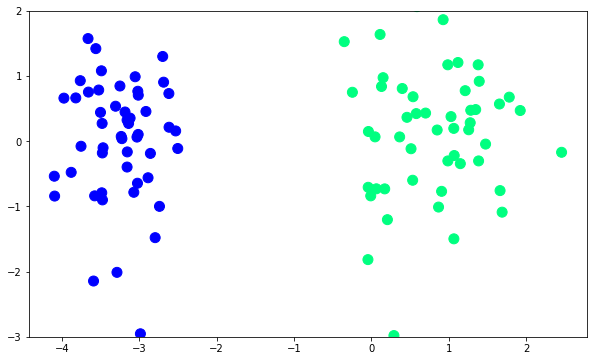

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

In [ ]:
lor = LogisticRegression(penalty='none',solver='sag')
lor.fit(X,y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


LogisticRegression(penalty='none', solver='sag')

In [ ]:
print(lor.coef_)
print(lor.intercept_)
m = -(lor.coef_[0][0]/lor.coef_[0][1])
c = -(lor.intercept_/lor.coef_[0][1])

[[4.80709779 0.21056659]]
[5.78394196]


In [ ]:
x_inp = np.linspace(-3,3,100)
y_inp = m*x_inp + c

In [ ]:
def gd(X,y,epoch,lr):
  X = np.insert(X,0,1,axis=1)
  weights = np.random.randint(0,1,X.shape[1])
  for i in range(epoch):
    y_hat = sigmoid(np.dot(X,weights))
    weights = weights + lr*(np.dot((y-y_hat),X)/X.shape[0])
  return weights[1:], weights[0]

def sigmoid(z):
  return 1/(1+np.exp(-z))


In [ ]:
coef_,intercept_ = gd(X,y,epoch=5000, lr=0.1)
m1 = -(coef_[0]/coef_[1])
c1 = -(intercept_/coef_[1])
y_inp1 = m1*x_inp + c1

(-3.0, 2.0)

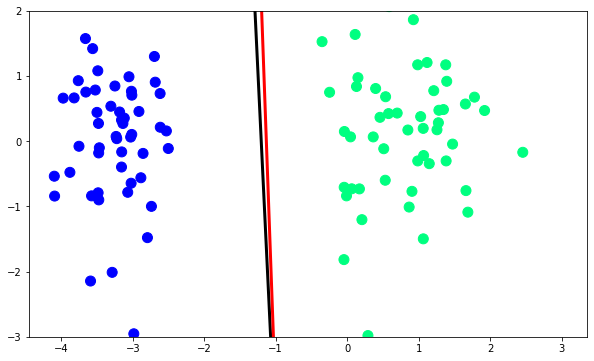

In [ ]:
plt.figure(figsize=(10,6))
# black line for sklearn LOR and red for gradient descent LOR
plt.plot(x_inp,y_inp,color='black',linewidth=3)
plt.plot(x_inp,y_inp1,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)